# Importing Data Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

# Importing Data

In [3]:
#import pickle file

path =  r'/Users/isomwinton/Desktop/Desktop - Isom’s MacBook Pro/Career Foundry/Data Immersion/Achievement 6/USA Real Estate Analysis 03-2024'
usa = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'real_estate_cleaned_no dups_3-12-2024.pkl'))


In [4]:
usa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93047 entries, 0 to 2001632
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   status          93047 non-null  category      
 1   bed             93047 non-null  float64       
 2   bath            93047 non-null  float64       
 3   acre_lot        93047 non-null  float64       
 4   city            93040 non-null  object        
 5   state           93047 non-null  object        
 6   zip_code        93047 non-null  object        
 7   house_size      93047 non-null  float64       
 8   prev_sold_date  58428 non-null  datetime64[ns]
 9   price           93047 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(5), object(3)
memory usage: 7.2+ MB


In [5]:
# Apply the conditions to categorize prices of houses
usa.loc[(usa['price'] >= 10000) & (usa['price'] < 50000), 'price_category'] = 'Cheapest Housing'
usa.loc[(usa['price'] >= 50000) & (usa['price'] < 100000), 'price_category'] = 'Low-end Affordable'
usa.loc[(usa['price'] >= 100000) & (usa['price'] < 250000), 'price_category'] = 'Affordable'
usa.loc[(usa['price'] >= 250000) & (usa['price'] < 400000), 'price_category'] = 'Middle Affordable'
usa.loc[(usa['price'] >= 400000) & (usa['price'] < 650000), 'price_category'] = 'Upper Affordable'
usa.loc[(usa['price'] >= 650000) & (usa['price'] < 800000), 'price_category'] = 'High-End'
usa.loc[(usa['price'] > 800000), 'price_category'] = 'Luxury'


In [6]:
usa['price_category'].value_counts(dropna = False)

price_category
Affordable            25932
Middle Affordable     23106
Upper Affordable      19243
Luxury                10607
High-End               6661
Low-end Affordable     6017
Cheapest Housing       1412
nan                      69
Name: count, dtype: int64

In [7]:
usa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93047 entries, 0 to 2001632
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   status          93047 non-null  category      
 1   bed             93047 non-null  float64       
 2   bath            93047 non-null  float64       
 3   acre_lot        93047 non-null  float64       
 4   city            93040 non-null  object        
 5   state           93047 non-null  object        
 6   zip_code        93047 non-null  object        
 7   house_size      93047 non-null  float64       
 8   prev_sold_date  58428 non-null  datetime64[ns]
 9   price           93047 non-null  float64       
 10  price_category  93047 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(5), object(4)
memory usage: 7.9+ MB


# Data Cleaning

In [8]:
usa.columns

Index(['status', 'bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code',
       'house_size', 'prev_sold_date', 'price', 'price_category'],
      dtype='object')

In [9]:
usa.head()

status  bed  bath  acre_lot           city        state zip_code  \
0  for_sale  3.0   2.0      0.12       Adjuntas  Puerto Rico    00601   
1  for_sale  4.0   2.0      0.08       Adjuntas  Puerto Rico    00601   
2  for_sale  2.0   1.0      0.15     Juana Diaz  Puerto Rico    00795   
3  for_sale  4.0   2.0      0.10          Ponce  Puerto Rico    00731   
5  for_sale  4.0   3.0      0.46  San Sebastian  Puerto Rico    00612   

   house_size prev_sold_date     price      price_category  
0       920.0            NaT  105000.0          Affordable  
1      1527.0            NaT   80000.0  Low-end Affordable  
2       748.0            NaT   67000.0  Low-end Affordable  
3      1800.0            NaT  145000.0          Affordable  
5      2520.0            NaT  179000.0          Affordable

In [10]:
usa.shape

(93047, 11)

### Missing Values

In [11]:
# Check for missing values

usa.isnull().sum()

status                0
bed                   0
bath                  0
acre_lot              0
city                  7
state                 0
zip_code              0
house_size            0
prev_sold_date    34619
price                 0
price_category        0
dtype: int64

In [12]:
# Checking the city names that are missing while cross checking with 'state' and 'zip_code'
missing_cities = usa[usa['city'].isna()][['city', 'state', 'zip_code']]


In [13]:
missing_cities

city         state zip_code
481645   NaN    New Jersey    07062
578730   NaN    New Jersey    08001
913959   NaN      New York    00000
1214474  NaN      New York    12726
1274211  NaN      New York    12733
1313020  NaN      New York    13081
1750253  NaN  Pennsylvania    16329

In [14]:
# Create a dictionary that maps zip codes to city names
zip_to_city = {
    '07062': 'Plainfield',
    '08001': 'Alloway',
    '12726': 'Cochecton',
    '13081': 'King Ferry',
    '12733': 'Fallsburg',
    '16329': 'Irvine'
}


In [15]:
# Create a new 'filled_city' column that fills missing values in 'city' based on 'zip_code'
usa['filled_city'] = usa['city'].fillna(usa['zip_code'].map(zip_to_city))



In [16]:
#Replace the original 'city' column with the filled values:
usa['city'] = usa['filled_city']
del usa['filled_city']  # Remove the temporary column 

In [17]:
# Check for missing values

usa.isnull().sum()

status                0
bed                   0
bath                  0
acre_lot              0
city                  1
state                 0
zip_code              0
house_size            0
prev_sold_date    34619
price                 0
price_category        0
dtype: int64

#### The only missing city value is because the zip code was not available. The 'prev_sold_date' variable will have missing values if the property was never sold before. 

### Duplicate Checks

In [59]:
dubs = usa.duplicated()
dubs.shape
# No duplicates

(93047,)

# Data Prep For Regression Analysis


In [60]:
usa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93047 entries, 0 to 2001632
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   status          93047 non-null  category      
 1   bed             93047 non-null  float64       
 2   bath            93047 non-null  float64       
 3   acre_lot        93047 non-null  float64       
 4   city            93046 non-null  object        
 5   state           93047 non-null  object        
 6   zip_code        93047 non-null  object        
 7   house_size      93047 non-null  float64       
 8   prev_sold_date  58428 non-null  datetime64[ns]
 9   price           93047 non-null  float64       
 10  price_category  93047 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(5), object(4)
memory usage: 7.9+ MB


## Explore Data Visually to look for variables to test

/Users/isomwinton/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/isomwinton/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/isomwinton/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/isomwinton/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

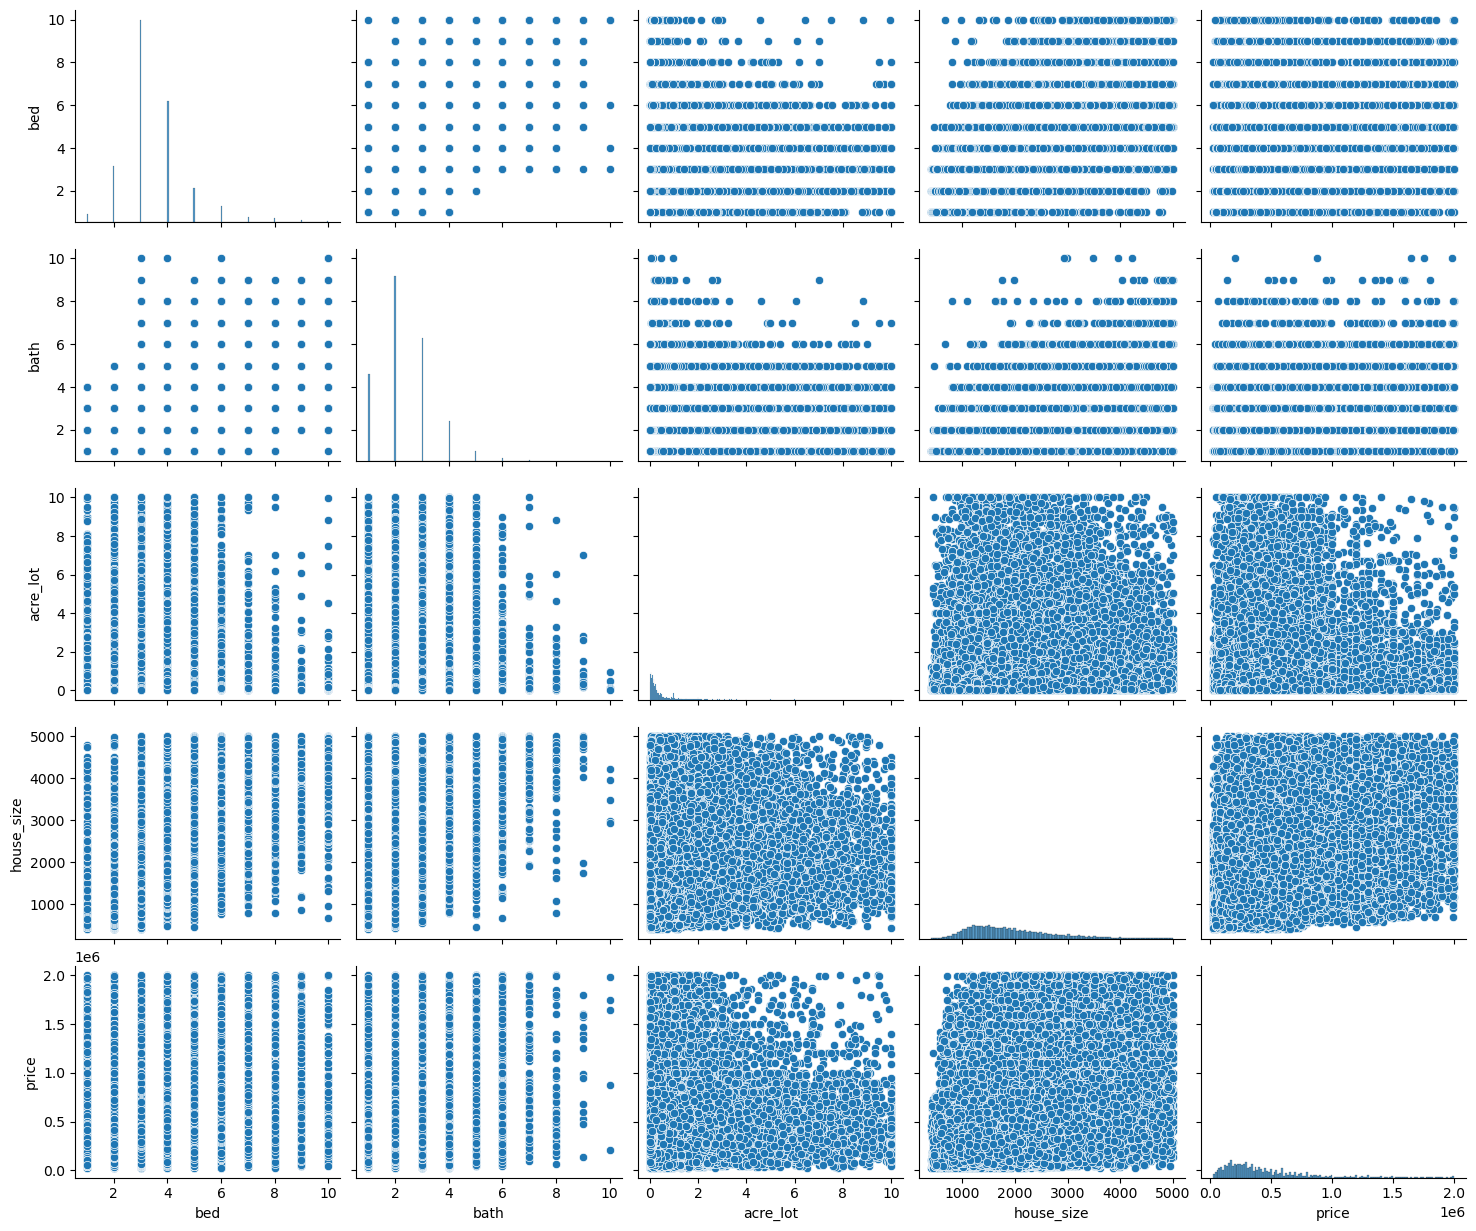

In [91]:
# Create a pairplot using the dataframe
sns.pairplot(usa, height=2.5, aspect=1.2)  # Adjusting the height and width

In [92]:
#Too many data points so I will sample 25% of the data
# Sampling 25% of the data
sampled_usa = usa.sample(frac=0.01, random_state=42) 

/Users/isomwinton/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/isomwinton/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/isomwinton/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/isomwinton/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

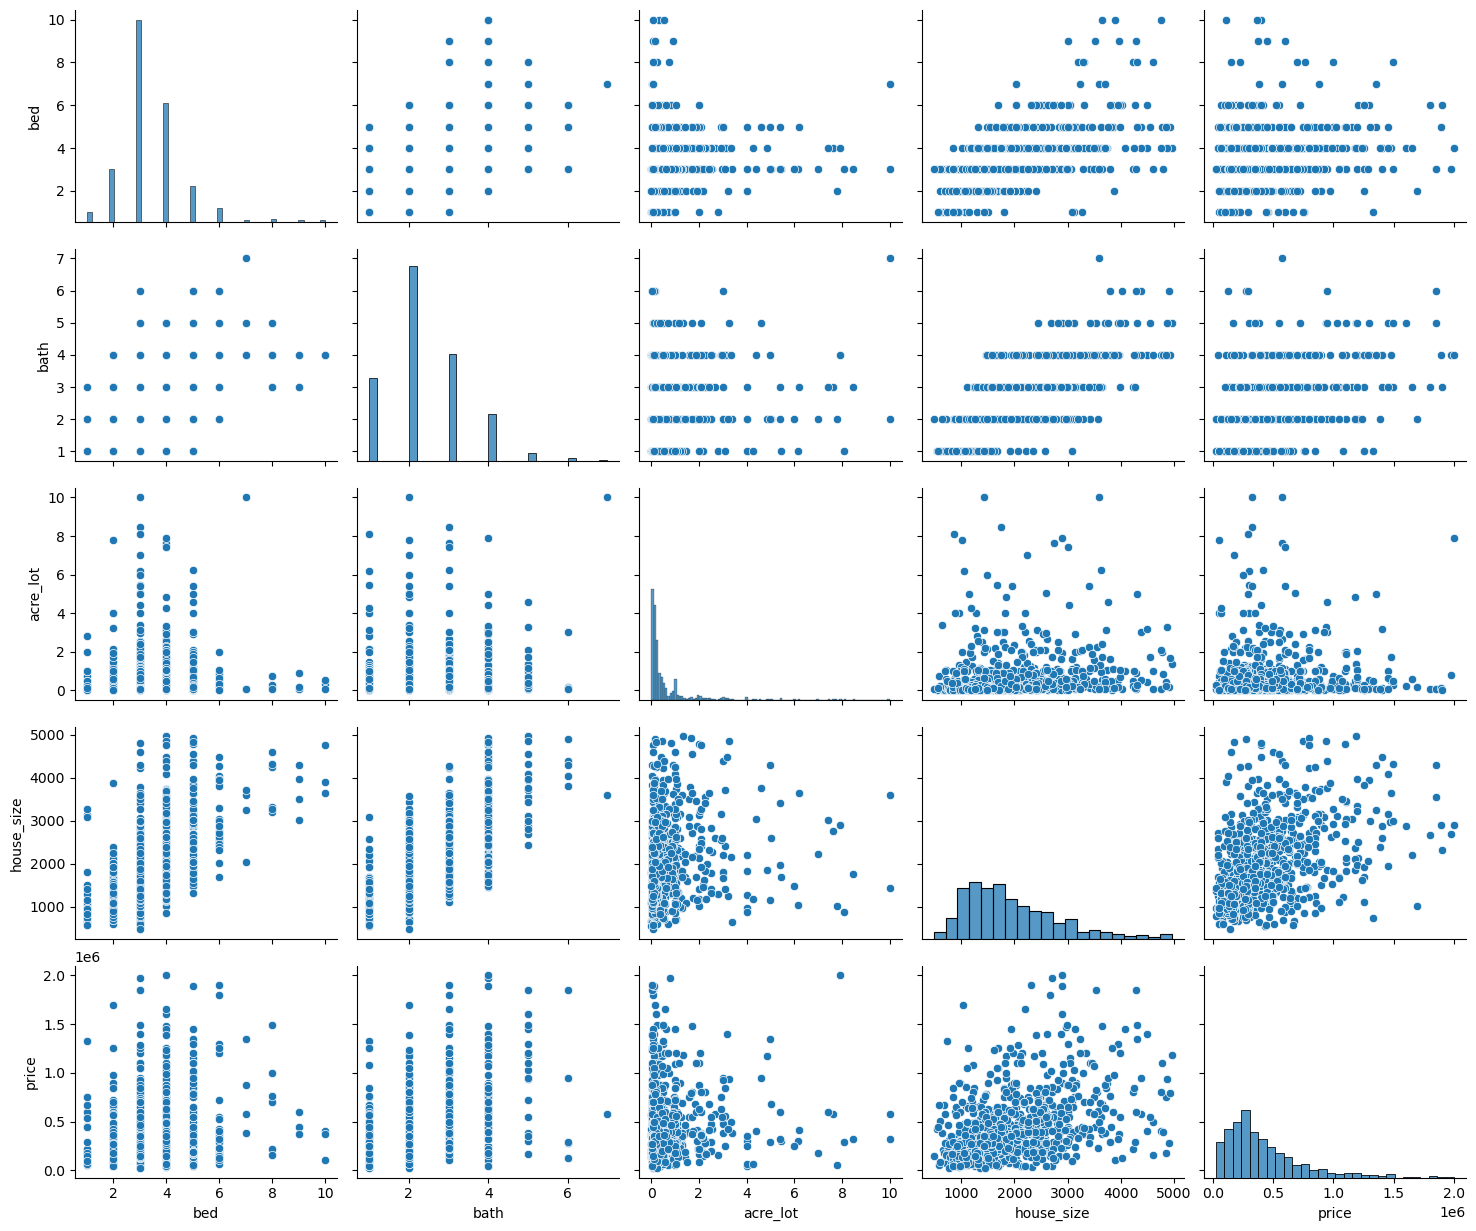

In [93]:
# Create a pairplot using the sampled data
sns.pairplot(sampled_usa, height=2.5, aspect=1.2)

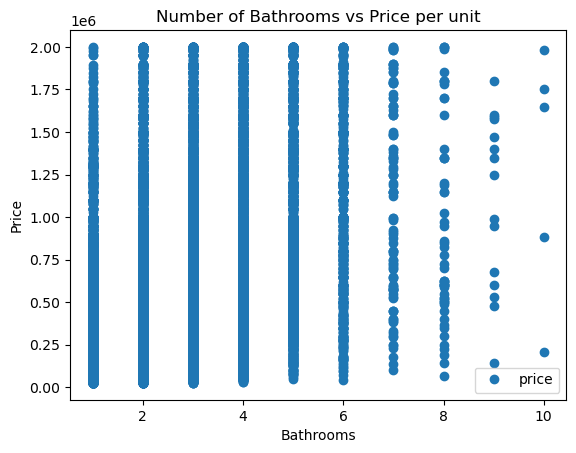

In [61]:
# Create a scatterplot using matplotlib to understand the relationship betweeen X='bath' and y= 'price'
usa.plot(x = 'bath', y= 'price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of Bathrooms vs Price per unit')  
plt.xlabel('Bathrooms')  
plt.ylabel('Price')  
plt.show()

# Hypothesis: In the USA housing market, the number of bedrooms has a moderate impact on the market price of a property, while the number of bathrooms tends to have a more pronounced effect.

In [63]:
# Reshape the variables into NumPy arrays and put them into separate objects to prepare for the regression analysis.

X = usa['bath'].values.reshape(-1,1)
y = usa['price'].values.reshape(-1,1)

In [64]:
X

array([[2.],
       [2.],
       [1.],
       ...,
       [1.],
       [3.],
       [3.]])

In [65]:
y

array([[105000.],
       [ 80000.],
       [ 67000.],
       ...,
       [ 85000.],
       [519900.],
       [440000.]])

In [66]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Regression Analysis

In [67]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [68]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [69]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

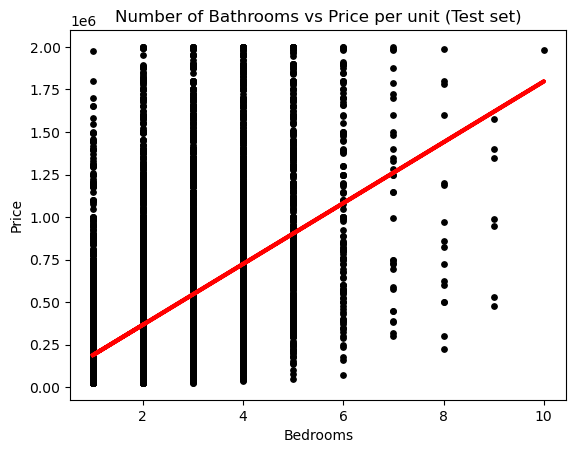

In [70]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='black', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of Bathrooms vs Price per unit (Test set)')
plot_test.xlabel('Bedrooms')
plot_test.ylabel('Price')
plot_test.show()

In [71]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [72]:
# Print the model summary statistics to evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[178783.20989117]]
Mean squared error:  85460800664.79123
R2 score:  0.2712569153958512


In [73]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

Actual      Predicted
0   1258000.0  366871.428724
1     94900.0  366871.428724
2    189900.0  188088.218833
3    149900.0  366871.428724
4    799900.0  545654.638615
5    780000.0  545654.638615
6    379000.0  545654.638615
7     89900.0  188088.218833
8    100000.0  188088.218833
9    280000.0  545654.638615
10   279900.0  545654.638615
11   475000.0  366871.428724
12   879900.0  724437.848506
13   359900.0  366871.428724
14   269900.0  366871.428724
15   509900.0  366871.428724
16   985000.0  366871.428724
17   249950.0  366871.428724
18   135000.0  366871.428724
19   329900.0  366871.428724
20   149500.0  188088.218833
21   275000.0  366871.428724
22   850000.0  366871.428724
23   265000.0  366871.428724
24   215000.0  366871.428724
25   219900.0  188088.218833
26   160000.0  188088.218833
27    50000.0  188088.218833
28   395500.0  545654.638615
29    99000.0  188088.218833

#### Our model has performed poorly as displayed to the eye and statistics above. 

### Compare how the regression model fits the training set

In [74]:
# Predict variables

y_predicted_train = regression.predict(X_train) # This is predicting X_train as we already did this for the test set above

In [75]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [76]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[178783.20989117]]
Mean squared error:  86048593826.07759
R2 score:  0.280716719957249


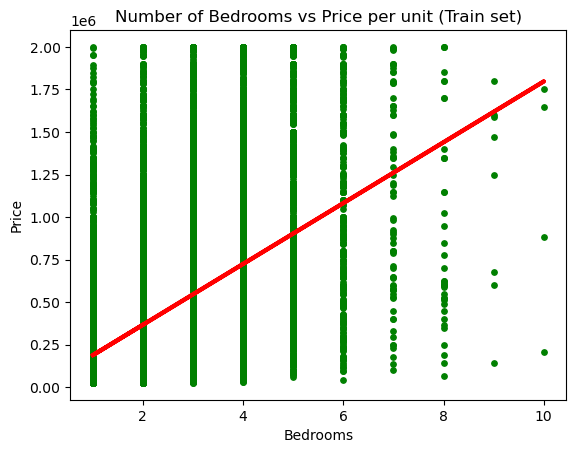

In [77]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Number of Bedrooms vs Price per unit (Train set)')
plot_test.xlabel('Bedrooms')
plot_test.ylabel('Price')
plot_test.show()

In [78]:
usa.describe()

bed          bath      acre_lot    house_size  \
count  93047.000000  93047.000000  93047.000000  93047.000000   
mean       3.488936      2.358088      0.647135   1960.511354   
min        1.000000      1.000000      0.010000    408.000000   
25%        3.000000      2.000000      0.100000   1312.000000   
50%        3.000000      2.000000      0.220000   1773.000000   
75%        4.000000      3.000000      0.550000   2421.000000   
max       10.000000     10.000000     10.000000   5000.000000   
std        1.203542      1.022183      1.236172    865.189425   

                      prev_sold_date         price  
count                          58428  9.304700e+04  
mean   2009-06-02 04:23:17.412199680  4.304612e+05  
min              1901-01-01 00:00:00  2.500000e+04  
25%              2003-01-17 00:00:00  1.950000e+05  
50%              2011-08-01 00:00:00  3.299000e+05  
75%              2018-04-30 00:00:00  5.500000e+05  
max              2023-03-01 00:00:00  2.000000e+06  
std                              NaN  3.448602e+05

# I'd like to see if we can create a better model when we only analyze prices between the 1st and 3rd quartiles of the 'price variable'

In [80]:
# Create a df with the values from the 'price' variable that are between the 1st and 3rd price quartiles

usa_test = usa[(usa['price'] >= 195000) & (usa['price'] <= 550000)]

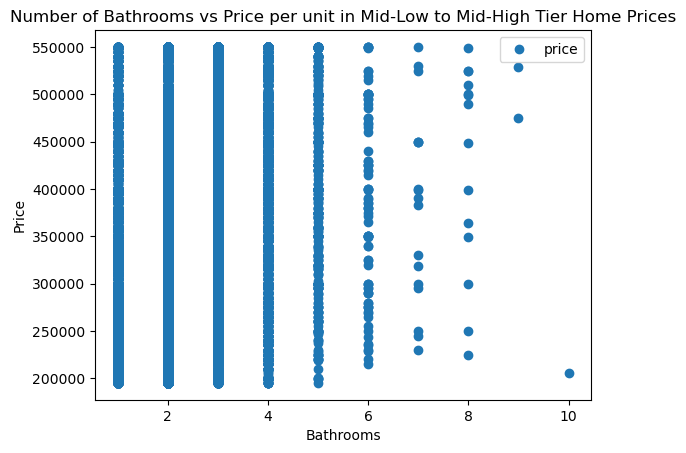

In [81]:
# See how the scatterplot looks

usa_test.plot(x = 'bath', y='price', style='o')  
plt.title('Number of Bathrooms vs Price per unit in Mid-Low to Mid-High Tier Home Prices')  
plt.xlabel('Bathrooms')  
plt.ylabel('Price')  
plt.show()

In [83]:
# Reshape the graph for better visability.

X_2 = usa_test['bath'].values.reshape(-1,1)
y_2 = usa_test['price'].values.reshape(-1,1)

In [84]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [85]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [86]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [87]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [88]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[37004.26842715]]
Mean squared error:  8859700322.617195
R2 score:  0.09887489614992728


#### We see even less of a fit model when we run this regression model. 

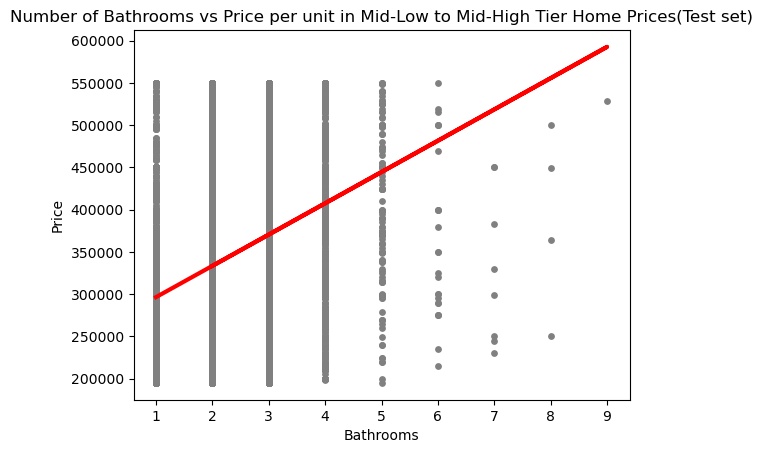

In [89]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Number of Bathrooms vs Price per unit in Mid-Low to Mid-High Tier Home Prices(Test set)')
plot_test.xlabel('Bathrooms')
plot_test.ylabel('Price')
plot_test.show()

In [90]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

Actual      Predicted
0   325000.0  333534.954779
1   259000.0  333534.954779
2   314900.0  370539.223206
3   538000.0  370539.223206
4   539900.0  333534.954779
5   299900.0  333534.954779
6   429000.0  333534.954779
7   325000.0  296530.686352
8   299900.0  296530.686352
9   272500.0  370539.223206
10  239900.0  333534.954779
11  249900.0  333534.954779
12  544900.0  370539.223206
13  399000.0  370539.223206
14  199900.0  333534.954779
15  199900.0  333534.954779
16  199900.0  333534.954779
17  255000.0  296530.686352
18  475000.0  296530.686352
19  474000.0  333534.954779
20  305000.0  296530.686352
21  359000.0  370539.223206
22  350000.0  370539.223206
23  325900.0  370539.223206
24  195000.0  296530.686352
25  230000.0  333534.954779
26  499900.0  333534.954779
27  329900.0  333534.954779
28  215000.0  370539.223206
29  400000.0  370539.223206

# Based the the regression models above, we can concluded that the number of bathrooms in a home do not correlate well to the actual price of the home. There is a lot of variance in our data which mean we'd need to run a multi-dimensional analysis to create a better model that could predict house prices. 

In [18]:
# Export usa data to pkl
usa.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'real_estate_cleaned_3-13-2024.pkl'))